# Modeling microbial interactions between guilds of traits

Definitions:

1. __Trait__: ability to acquire an essential nutrient from the environment
2. __Guild__: set of taxa which follows the same strategy to satisfy a trait

Principles:

1. A taxon may belong to more than one guild in the same trait
2. Each taxon must belong to at least one guild of each trait to ensure survival


Model:

We define a multipartite graph $G(n, e)$ as 

<img src="Graph.png" alt="Example grpah" style="width:60%; display:block; margin:auto">

In [1]:
import numpy as np
import igraph as ig
import leidenalg

nodes = ['S1', 'S2', 'S3', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7']
colors = [['S1', 'S2', 'S3'], ['G1', 'G2'], ['G3', 'G4', 'G5'], ['G6', 'G7']]

A = np.array(
[
    [0,0,0,1,0,1,1,0,0,1],
    [0,0,0,0,1,1,0,1,1,0],
    [0,0,0,1,0,0,1,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0]
])

OSError: no library called "cairo" was found
cannot load library 'C:\Program Files (x86)\GtkSharp\2.12\bin\libcairo-2.dll': error 0xc1
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0xc1

# Partitioning vertices with the Leiden algorithm

We want to find communities of vertices that cluster within the graph. Additionally, our graph is bipartite, and we are only interested in finding communities of vertices corresponding to taxa. We will employ the Leiden algorithm to find such communities.

In [2]:
G = ig.Graph.Adjacency(A, mode='undirected')
partition = leidenalg.find_partition(G, leidenalg.ModularityVertexPartition)

# Color only S vertices
n_clusters = max(partition.membership) + 1
pal = ig.drawing.colors.ClusterColoringPalette(n_clusters)

colors = [(0.6,0.6,0.6,1.0) for _ in range(len(G.vs))]
for i, m in enumerate(partition.membership[:3]):
    colors[i] = pal.get(m)

edge_widths = [1 for _ in range(len(G.es))]
for i, edge in enumerate(G.es):
    clust_s = partition.membership[edge.source]
    clust_t = partition.membership[edge.target]
    if clust_s != clust_t:
        edge_widths[i] = 0.3 * edge_widths[i]

# Plot graph
styles = {
    'vertex_color': colors,
    'vertex_size': 32,
    'edge_width': edge_widths
    
}
ig.plot(G, vertex_label=nodes, **styles)

AttributeError: Plotting not available; please install pycairo or cairocffi

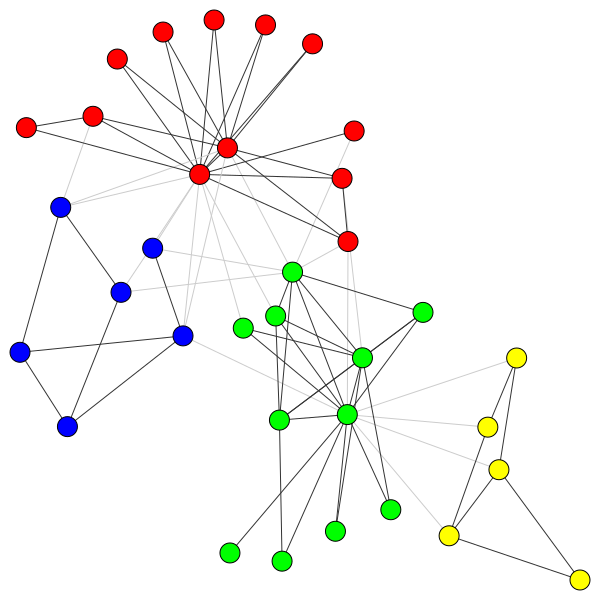

In [3]:
G = ig.Graph.Famous('Zachary')
partition = leidenalg.find_partition(G, leidenalg.ModularityVertexPartition);
ig.plot(partition)

With associated adjacency matrix:

$$A = 
\begin{pmatrix}
\; & S_1 & S_2 & S_3 & G_1 & G_2 & G_3 & G_4 & G_5 & G_6 & G_7 \\
S_1 & \\
S_2 & \\
S_3 & \\
G_1 & \\
G_2 & \\
G_3 & \\
G_4 & \\
G_5 & \\
G_6 & \\
G_7 &
\end{pmatrix}$$